In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [2]:
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4


plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [3]:
nomes = pd.read_csv('./saidas/nameRepo.txt', names=['Nome'])
commits = pd.read_csv('./saidas/numCommits.txt', names=['Número de Commits'])
linguagem = pd.read_csv('./saidas/lang.txt', names=['Linguagem'])

In [4]:
df1 = nomes.join([linguagem, commits])

# Boxplots

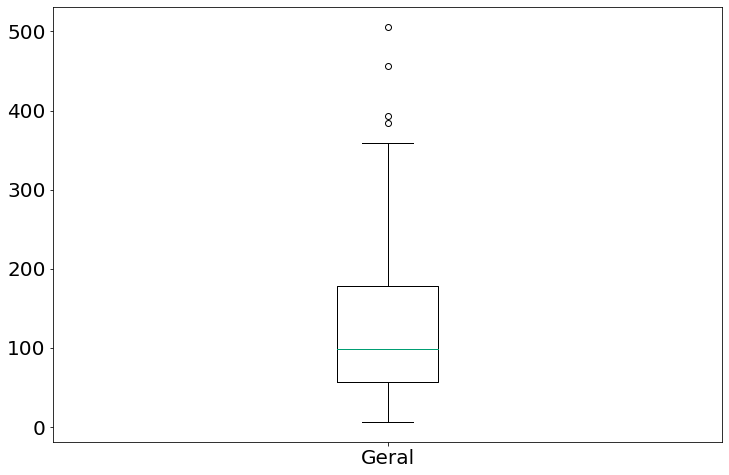

In [6]:
plt.boxplot(df1['Número de Commits'], labels=['Geral'])
plt.show()

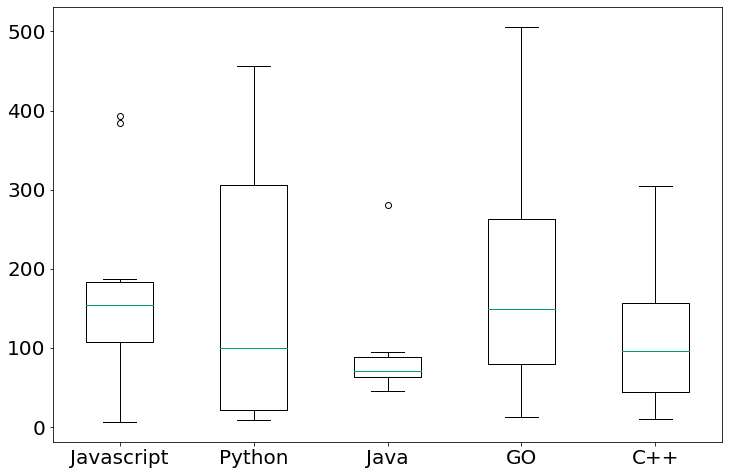

In [8]:
javascript = df1['Número de Commits'][df1['Linguagem'] == '1_Javascript']
python = df1['Número de Commits'][df1['Linguagem'] == '2_Python']
java = df1['Número de Commits'][df1['Linguagem'] == '3_Java']
go = df1['Número de Commits'][df1['Linguagem'] == '4_GO']
cpp = df1['Número de Commits'][df1['Linguagem'] == '5_C++']

data = [javascript, python, java, go, cpp]
plt.subplot().boxplot(data, labels=['Javascript', 'Python', 'Java', 'GO', 'C++'])
plt.show()

# Mapa de Calor

In [9]:
directory = '/Users/brunovieira/Desktop/REPOSITORIOS/saidas/heatmap/'
heatmapDF = pd.DataFrame(columns=['Linguagem', 'Repositório', 'Local de Mudança'])

for lang in os.listdir(directory):
    if lang != '.DS_Store':
        for repo in os.listdir(directory+lang):
            if repo != '.DS_Store':
                diff = open(directory+lang+'/'+repo+'/diff.txt', "r")
                nRows = np.array(pd.read_csv(directory+lang+'/'+repo+'/nRows.csv', names=['# de linhas']))
                diffStr = diff.read()
                diffSplit = re.split("diff --git", diffStr)
                diffSplit.pop(0)
                
                rowsOfDiff = []
                for i in range(len(diffSplit)):
                    a = re.findall(r'@@[ X][-](.*?)[ X][+]', diffSplit[i])
                    b = []
                    for j in a:
                        c = int(float(j.replace(',','.')))
                        b.append(c)
                    rowsOfDiff.append(b)
                
                heatmapChanges = []
                for i in range(len(rowsOfDiff)):
                    for j in range(len(rowsOfDiff[i])):
                        if nRows[i] == 0:
                            heatmapChanges.append(0)
                        elif (rowsOfDiff[i][j] / nRows[i]) > 1:
                            heatmapChanges.append(1)
                        else:
                            heatmapChanges.append(np.float(rowsOfDiff[i][j] / nRows[i]))
                            
                df = pd.DataFrame(columns=['Linguagem', 'Repositório', 'Local de Mudança'])
                df['Local de Mudança'] = heatmapChanges
                df['Repositório'] = repo
                df['Linguagem'] = lang
                heatmapDF = heatmapDF.append(df)

In [10]:
heatmapDF['x10'] = np.round(heatmapDF['Local de Mudança'] * 10)
heatmapDF['x100'] = np.round(heatmapDF['Local de Mudança'] * 100)
heatmapDF

,Linguagem,Repositório,Local de Mudança,x10,x100
0,4_GO,syncthing,0.567797,6.0,57.0
1,4_GO,syncthing,0.542373,5.0,54.0
2,4_GO,syncthing,0.949153,9.0,95.0
3,4_GO,syncthing,0.044248,0.0,4.0
4,4_GO,syncthing,0.789474,8.0,79.0
5,4_GO,syncthing,0.991228,10.0,99.0
6,4_GO,syncthing,0.203540,2.0,20.0
7,4_GO,syncthing,0.247788,2.0,25.0
8,4_GO,syncthing,0.300885,3.0,30.0
9,4_GO,syncthing,0.336283,3.0,34.0


## Geral

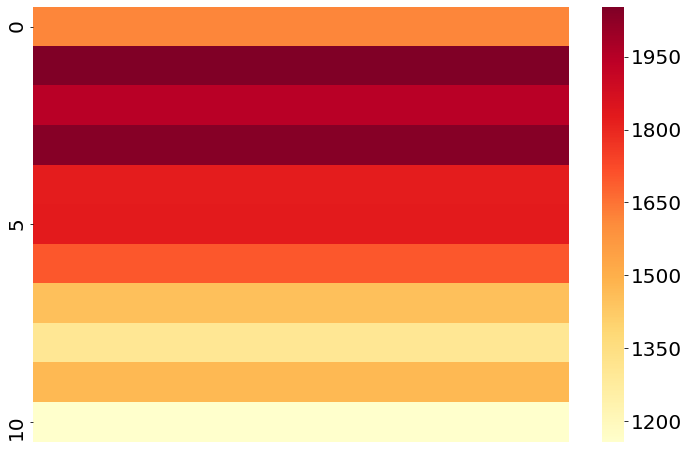

In [11]:
data10 = np.empty([11, 1])
for i in range(11):
    data10[i] = heatmapDF['x10'][heatmapDF['x10'] == i].count()


    
ax = sns.heatmap(data10, cmap="YlOrRd", yticklabels=5, xticklabels=False)

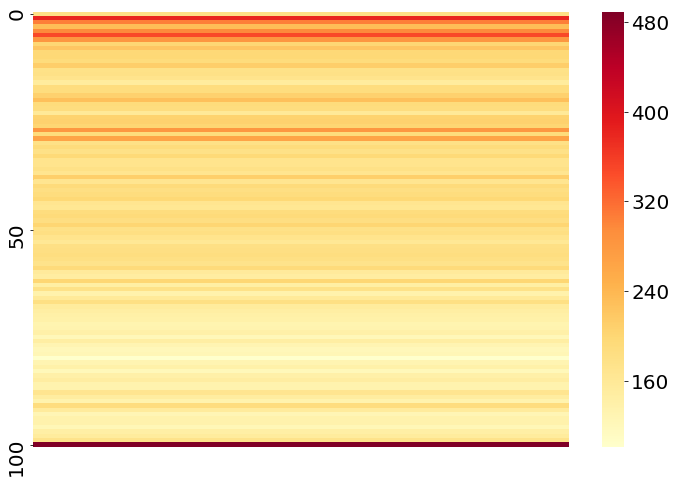

In [12]:
data100 = np.empty([101, 1])
for i in range(101):
    data100[i] = heatmapDF['x100'][heatmapDF['x100'] == i].count()
    
bx = sns.heatmap(data100, cmap="YlOrRd", yticklabels=50, xticklabels=False)

# Menos Populares
# Boxplots

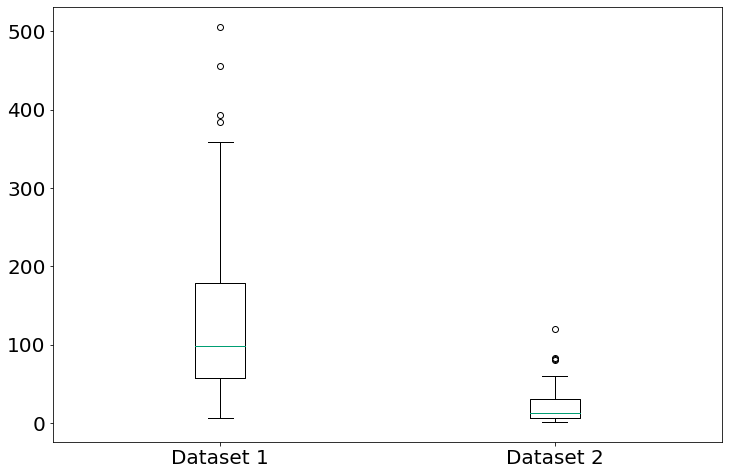

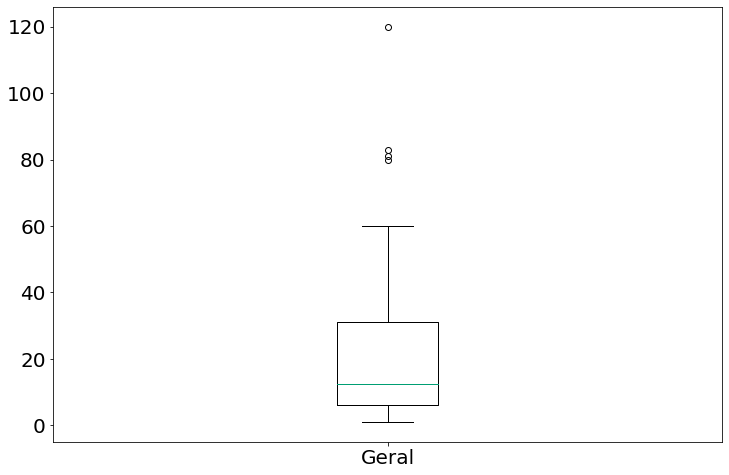

In [23]:
nomes = pd.read_csv('./menos_populares/saidas/nameRepo.txt', names=['Nome'])
commits = pd.read_csv('./menos_populares/saidas/numCommits.txt', names=['Número de Commits'])
linguagem = pd.read_csv('./menos_populares/saidas/lang.txt', names=['Linguagem'])
df2 = nomes.join([linguagem, commits])

data_to_plot = [df1['Número de Commits'], df2['Número de Commits']]
plt.boxplot(data_to_plot, labels=['Dataset 1', 'Dataset 2'])
plt.show()

# plt.boxplot(df1['Número de Commits'], labels=['Geral'])
plt.boxplot(df2['Número de Commits'], labels=['Geral'])
plt.show()

In [ ]:
javascript = df['Número de Commits'][df['Linguagem'] == '1_javascript']
java = df['Número de Commits'][df['Linguagem'] == '2_Java']
python = df['Número de Commits'][df['Linguagem'] == '3_Python']
html = df['Número de Commits'][df['Linguagem'] == '4_HTML']
ruby = df['Número de Commits'][df['Linguagem'] == '5_Ruby']

data = [javascript, java, python, html, ruby]
plt.subplot().boxplot(data, labels=['Javascript', 'Java', 'Python', 'HTML', 'Ruby'])
plt.show()

# Mapa de Calor

In [24]:
directory = '/Users/brunovieira/Desktop/REPOSITORIOS/menos_populares/saidas/heatmap/'
heatmapDF = pd.DataFrame(columns=['Linguagem', 'Repositório', 'Local de Mudança'])

for lang in os.listdir(directory):
    if lang != '.DS_Store':
        for repo in os.listdir(directory+lang):
            if repo != '.DS_Store':
                diff = open(directory+lang+'/'+repo+'/diff.txt', "r")
                nRows = np.array(pd.read_csv(directory+lang+'/'+repo+'/nRows.csv', names=['# de linhas']))
                diffStr = diff.read()
                diffSplit = re.split("diff --git", diffStr)
                diffSplit.pop(0)
                
                rowsOfDiff = []
                for i in range(len(diffSplit)):
                    a = re.findall(r'@@[ X][-](.*?)[ X][+]', diffSplit[i])
                    b = []
                    for j in a:
                        c = int(float(j.replace(',','.')))
                        b.append(c)
                    rowsOfDiff.append(b)
                
                heatmapChanges = []
                for i in range(len(rowsOfDiff)):
                    for j in range(len(rowsOfDiff[i])):
                        if nRows[i] == 0:
                            heatmapChanges.append(0)
                        elif (rowsOfDiff[i][j] / nRows[i]) > 1:
                            heatmapChanges.append(1)
                        else:
                            heatmapChanges.append(np.float(rowsOfDiff[i][j] / nRows[i]))
                            
                df = pd.DataFrame(columns=['Linguagem', 'Repositório', 'Local de Mudança'])
                df['Local de Mudança'] = heatmapChanges
                df['Repositório'] = repo
                df['Linguagem'] = lang
                heatmapDF = heatmapDF.append(df)

In [25]:
heatmapDF['x10'] = np.round(heatmapDF['Local de Mudança'] * 10)
heatmapDF['x100'] = np.round(heatmapDF['Local de Mudança'] * 100)
heatmapDF

,Linguagem,Repositório,Local de Mudança,x10,x100
0,2_Java,CircularProgressDrawable,0.303030,3.0,30.0
1,2_Java,CircularProgressDrawable,0.383838,4.0,38.0
2,2_Java,CircularProgressDrawable,0.060606,1.0,6.0
3,2_Java,CircularProgressDrawable,0.050505,1.0,5.0
4,2_Java,CircularProgressDrawable,0.206186,2.0,21.0
5,2_Java,CircularProgressDrawable,0.288660,3.0,29.0
6,2_Java,CircularProgressDrawable,0.371134,4.0,37.0
7,2_Java,CircularProgressDrawable,0.453608,5.0,45.0
8,2_Java,CircularProgressDrawable,0.646465,6.0,65.0
9,2_Java,CircularProgressDrawable,0.141414,1.0,14.0


## Geral

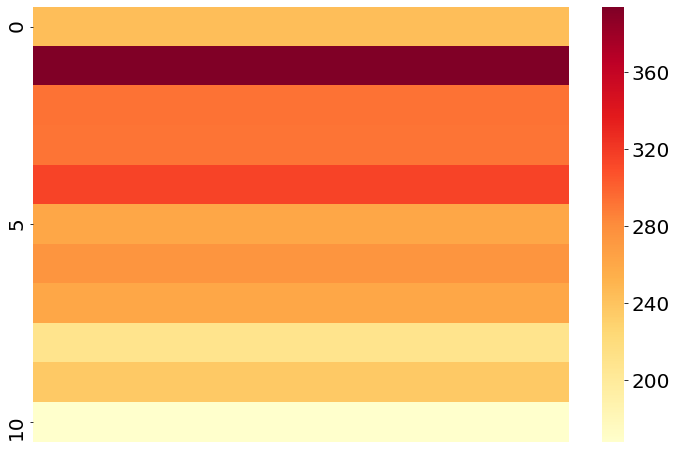

In [26]:
data10 = np.empty([11, 1])
for i in range(11):
    data10[i] = heatmapDF['x10'][heatmapDF['x10'] == i].count()


    
ax = sns.heatmap(data10, cmap="YlOrRd", yticklabels=5, xticklabels=False)

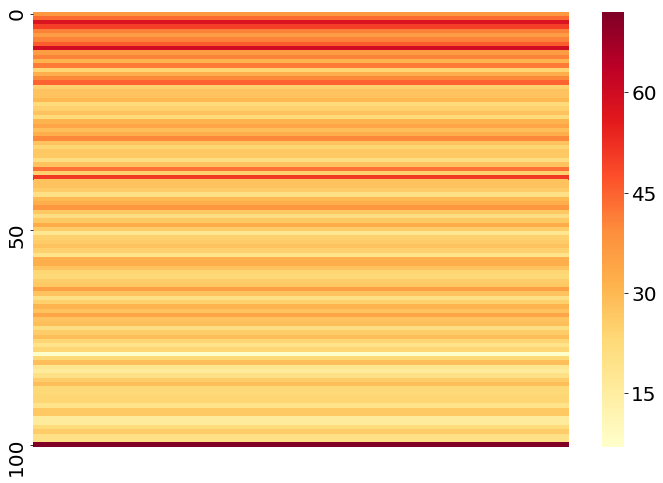

In [27]:
data100 = np.empty([101, 1])
for i in range(101):
    data100[i] = heatmapDF['x100'][heatmapDF['x100'] == i].count()
    
bx = sns.heatmap(data100, cmap="YlOrRd", yticklabels=50, xticklabels=False)

# Tags

In [28]:
tags = pd.read_csv('./tags.csv', names=['Linguagem', 'Repositório', 'Categoria'])
totalTags = len(tags)
freq = tags[['Categoria']].groupby('Categoria').Categoria.count().sort_values(ascending=False)
(freq/totalTags)*100

Categoria
Atualização de links                21.6
Correção ortográfica/gramatical     14.8
Inserção de nova informação         13.6
Atualização de versionamento         9.6
Atualização de informação            9.2
Alteração de texto                   6.8
Remoção de informação                6.4
Alteração de exemplo de código       4.8
Formatação                           3.6
Adição de link                       3.2
Remoção de link                      2.8
Alteração na estrutura do código     2.0
Alteração de posição                 1.6
Name: Categoria, dtype: float64